En este archivo se encuentra el procedimiento para los puntos 1 y 2 de la actividad A3.1

In [1]:
import cv2 as cv
import numpy as np
import matplotlib as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
(train_images,train_labels), (test_images,test_labels) =mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


1. Entrena un modelo de redes neuronales para clasificar los dígitos del 0 al 9, y muestra mediante gráficas el comportamiento del sistema a lo largo del entrenamiento. Especifica la exactitud del modelo tanto en entrenamiento como en validación.


In [2]:
# Print the shape of data
print(f"Training images shape: ",{train_images.shape})
print(f"Training labels shape: ",{train_labels.shape})
print("")
print(f"Testing images shape: ",{test_images.shape})
print(f"Testing labels shape: ",{test_labels.shape})

Training images shape:  {(60000, 28, 28)}
Training labels shape:  {(60000,)}

Testing images shape:  {(10000, 28, 28)}
Testing labels shape:  {(10000,)}


En este primer bloquede código, se obtuvieron las dimensiones del Data Frame de Mnist. Obvservamos que para el subconjunto de datos de entrenamiento, cuenta con 60 mil observaciones, y con imágenes de 28x28. Y para el subconjunto de prueba, tenemos 10 mil observaiciones.

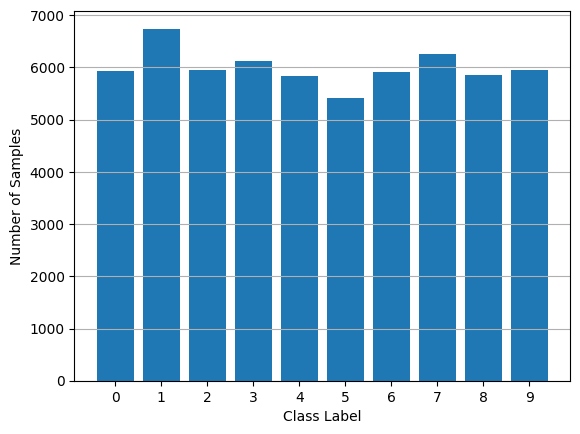

In [3]:
# Revisar proporsiones por clase

unique,counts=np.unique(train_labels,return_counts=True)

import matplotlib.pyplot as plt
plt.bar(unique,counts,tick_label=unique)
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.grid(axis="y")
plt.show()

Para este siguiente bloque de código, se hizo un gráfico de barras para tener una idea de la distribución de los dígitos del Data Frame. Observamos que está bastante balanceado, siendo el 1 el dígito más frecuente, y el 5 el menos. A pesar de ello, no hay un desbalance de clases marcado, por lo que no nos preocuparemos por ese problema.

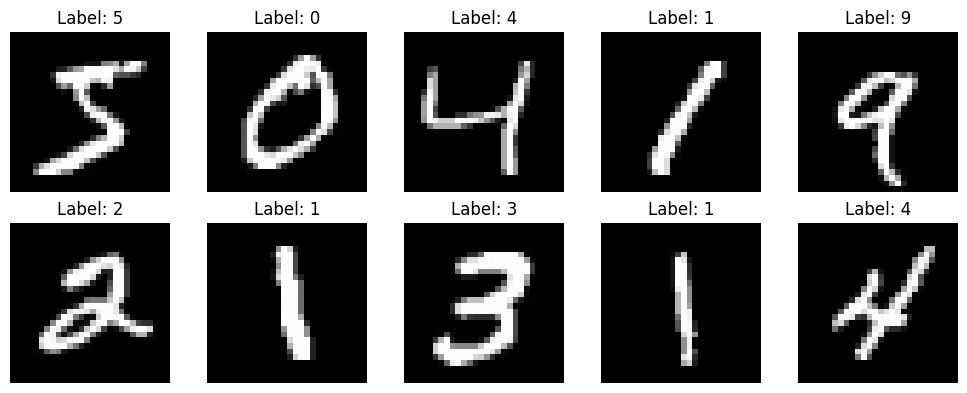

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
for i in range (10):
  plt.subplot(2,5,i+1)
  plt.imshow(train_images[i],cmap="gray")
  plt.title(f"Label: {train_labels[i]}")
  plt.axis("off")
plt.tight_layout()
plt.show()

En este bloque de código se hace display a los primeros 10 dígitos del Data Frame

In [5]:
# Rango de los datos

print(f"Min pixel value in training set: {train_images.min()}")
print(f"Max pixel value in training set: {train_images.max()}")

Min pixel value in training set: 0
Max pixel value in training set: 255


En este bloque de código se encuentrasn los valores máximos y mínimos de pixeles en las imágenes.

In [6]:
# Importar Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model=Sequential()

model.add(Flatten(input_shape=(28,28)))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


En este bloque de código comienza la estructura de lo que será el modelo de Redes Neuronales. Primero se importan librerías de *tensorflow*, Sequential, Dense, y Flatten.

*Sequiential* se utiliza como función que agrega las diferentes capas al modelo de manera lineal.

*Dense* es el "tipo" de capas que se van a utilizar en el modelo. En este caso,Dense representa una capa completamente conectada donde cada neurona recibe entradas de todas las neuronas de la capa anterior.

*Flatten* es una capa que transforma tensores multi-dimensionales a un tensor lineal, manteniendo el tamaño de los batches.

In [7]:
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))

#Optimizador
opt=tf.keras.optimizers.Adam(learning_rate=0.001)

#Compilar el modelo
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

En este bloque de código se agregan los métodos de activación del modelo. En este caso se utilizaron 2 capas con la función ReLu, y una última capa de "desición final" usando la función SoftMax. Además de esto, se definen optimizadores, y métricas de validación de desempeño.

In [8]:
# Funcion de paro
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_accuracy',patience=10,restore_best_weights=True)


En este bloque de código se crea una condición de paro, tal que si el modelo deja de mejorar en un cierto número de épocas, el modelo se detiene.

In [9]:
# Entrenar el modelo
history=model.fit(train_images,train_labels,epochs=100,validation_split=0.3,batch_size=40,callbacks=[early_stop])


Epoch 1/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7445 - loss: 5.8942 - val_accuracy: 0.8801 - val_loss: 0.4877
Epoch 2/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8963 - loss: 0.3840 - val_accuracy: 0.9074 - val_loss: 0.3461
Epoch 3/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9248 - loss: 0.2619 - val_accuracy: 0.9278 - val_loss: 0.3017
Epoch 4/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9445 - loss: 0.1932 - val_accuracy: 0.9383 - val_loss: 0.2960
Epoch 5/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9547 - loss: 0.1573 - val_accuracy: 0.9489 - val_loss: 0.1994
Epoch 6/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9619 - loss: 0.1299 - val_accuracy: 0.9409 - val_loss: 0.2317
Epoch 7/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9638 - loss: 0.1249 - val_accuracy: 0.9395 - val_loss: 0.2539
Epoch 8/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9680 - loss: 0

Después de haber declarado las condiciones de paro, métodos de activación, métricas, etc, el modélo está listo para ser entrenado.

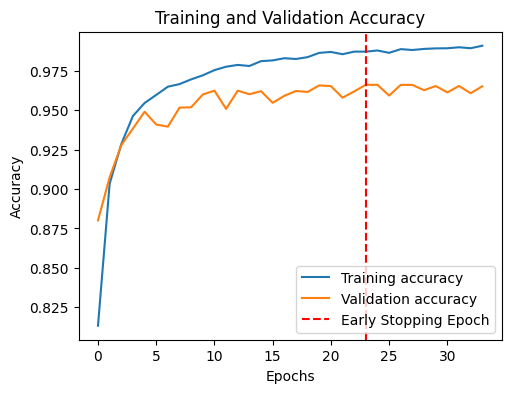

In [10]:
from matplotlib.ticker import MaxNLocator
stopped_epoch=early_stop.stopped_epoch
best_epoch=stopped_epoch-early_stop.patience
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"],label="Training accuracy")
plt.plot(history.history["val_accuracy"],label="Validation accuracy")
plt.axvline(x=best_epoch,color="r",linestyle="--",label="Early Stopping Epoch")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

Como podemos observar en la gráfica, en el grupo de entrenamiento, el modelo tiene un gran salto en *accuracy* en la época 5, pasando de 82% hasta casi 95%.

Ahora bien para el subconjunto de observaciones de validación, vemos que también tiene un salto en *accuracy* en la época 5,pasando de 87% a casi 95%.

Por último, vemos que, mediante la función de paro definida, el modelo desidió parar anticipadamente en la época 23 o 24, pues a partir de esa época no hay una mejora significativa en el desempeño.

2. Evalúa la exactitud del modelo en el conjunto de prueba generado al cargar la base de datos y compárala con la exactitud de validación del modelo. Realiza un comentario sobre los resultados de dicha comparación.

In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9637 - loss: 0.2641
Test accuracy: 0.9697999954223633


En este bloque de código se calculó el *accuracy* del modelo utilizando el grupo de obserbaciones de prueba. Se obsreva que da un valor de 96.97%, lo cual se acerca bastante al valor dado en el grupo de validación, que en la época de de paro, fue de aproximadamente 95-96%. Esto nos indica que el modelo no está tendiendo de manera fuerte al sobreajuste, pues las métricas en los 3 grupos se mantienen bastante similares.

<IPython.core.display.Javascript object>

Saved photo to photo.jpg


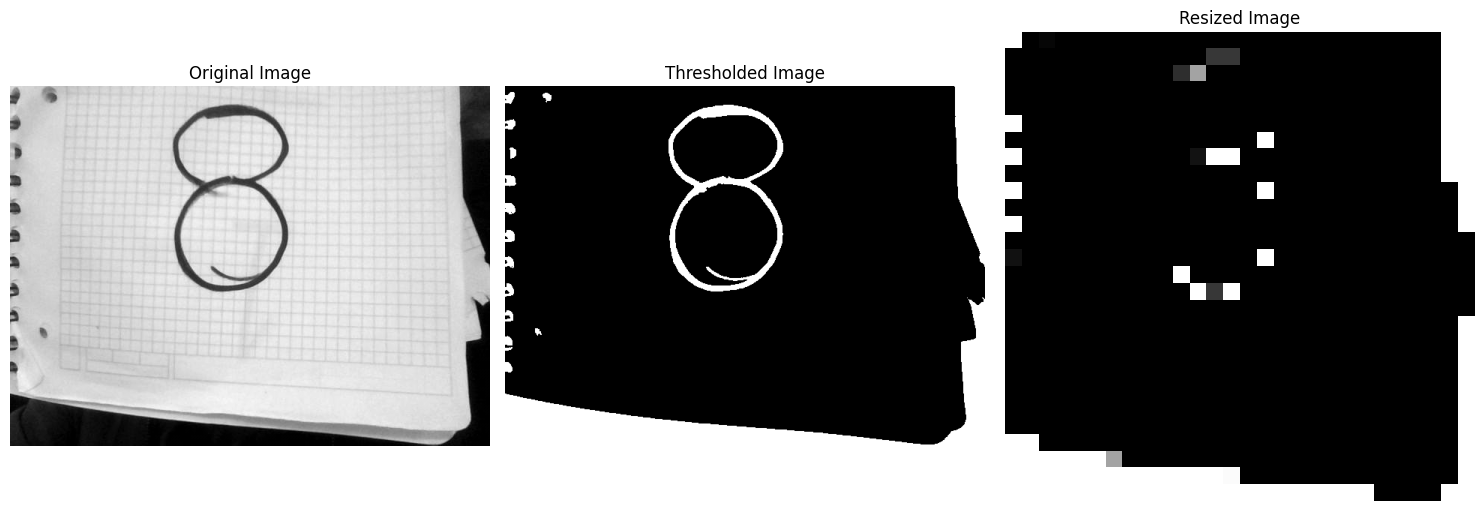

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted digit: 9


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode


def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture Photo';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# 1. Capture the photo
photo_file = take_photo()
print(f'Saved photo to {photo_file}')

# 2. Load and process the image
img = cv.imread(photo_file, cv.IMREAD_GRAYSCALE) # Load as grayscale

#Thresholding
thresh=cv.threshold(img,90,255,cv.THRESH_BINARY_INV)[1]

#Resize
resized_img = cv.resize(thresh, (28, 28))

# Display the images

fig,axes=plt.subplots(1,3,figsize=(15,5))

# Original
axes[0].imshow(img,cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

#Threshold
axes[1].imshow(thresh,cmap="gray")
axes[1].set_title("Thresholded Image")
axes[1].axis("off")

#Resized
axes[2].imshow(resized_img,cmap="gray")
axes[2].set_title("Resized Image")
axes  [2].axis("off")

plt.tight_layout()
plt.show()


input_img=resized_img.reshape(1,28,28)
# 4. Predict the digit
prediction = model.predict(input_img)
predicted_digit = np.argmax(prediction)

print(f'Predicted digit: {predicted_digit}')

Este bloque de código, se accede a la cámara del dispositivo para tomar una foto, y luego hacer un pre-procesado de la imagen (threshholding, binarizing y resizing), y luego se hace una predicción. Este bloque es más que nada para seguir probando el modelo con diferentes imágenes.

In [12]:
# Guardar el modelo

model.save("model_1.keras")

En este bloque de código se guarda el modelo generado para utilizarlo en los puntos restantes de la actividad.